In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Config
mpl.rcParams['font.family'] = 'sans-serif' 
sns.set_theme(style="white", palette=None)
plt.rcParams["figure.figsize"] = (16,7.5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-test-scores-of-students/test_scores.csv


# 1. Load data

In [2]:
df = pd.read_csv("../input/predict-test-scores-of-students/test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
df = df.set_index("student_id")

In [4]:
print("Shape:", df.shape)

Shape: (2133, 10)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
pretest,2133.0,54.955931,13.563101,22.0,44.0,56.0,65.0,93.0
posttest,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


Check for null values

In [6]:
df.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

Change some solumns dtype Float to Integer

In [7]:
df[["n_student", "pretest", "posttest"]] = df[["n_student", "pretest", "posttest"]].astype("int64")
#df.dtypes

# 2. Quick summary

In [8]:
print("Number of student in this dataset:", len(df))
male_pct = np.round(len(df[df.gender=="Male"])/len(df)*100, 1)
print("Male: {0}\nFemale: {1}".format(male_pct, 100 - male_pct))

Number of student in this dataset: 2133
Male: 50.5
Female: 49.5


In [9]:
"""
print("There are {0} schools with {1} different types among {2} regions".format(len(df["school"].unique()),
                                                                                len(df["school_type"].unique()),
                                                                                len(df["school_setting"].unique())
                                                                               )
     )
     
print("There are {0} classes with {1} different teaching method and {2} different lunch quality".format(
    len(df["classroom"].unique()),
    len(df["teaching_method"].unique()),
    len(df["school_setting"].unique()))
     )
"""

'\nprint("There are {0} schools with {1} different types among {2} regions".format(len(df["school"].unique()),\n                                                                                len(df["school_type"].unique()),\n                                                                                len(df["school_setting"].unique())\n                                                                               )\n     )\n     \nprint("There are {0} classes with {1} different teaching method and {2} different lunch quality".format(\n    len(df["classroom"].unique()),\n    len(df["teaching_method"].unique()),\n    len(df["school_setting"].unique()))\n     )\n'

**School**:

Number of school: **23**   
Type of school: **Public** or **Non-public**    
Region of school: **Urban, Suburban** or **Rural**

**Class**:  

Number of class: **97**    
Teaching method: **Standard** or **Experimental**              
Lunch quality: **different among classes in the same school**, can be **Does not qualify** or **Qualifies for reduced/free** lunch   
Number of students in class: about **14-31 students** per class.

**Student:**

Number of student: **2133**   
Gender percentage: 
* Male **50.5%**
* Female **49.5%**

**Test score:**   
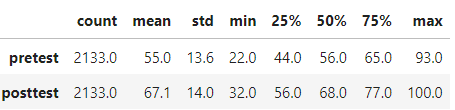

# 3. Quick EDA

> Distribution of posttest score

Text(0.5, 0, 'Score')

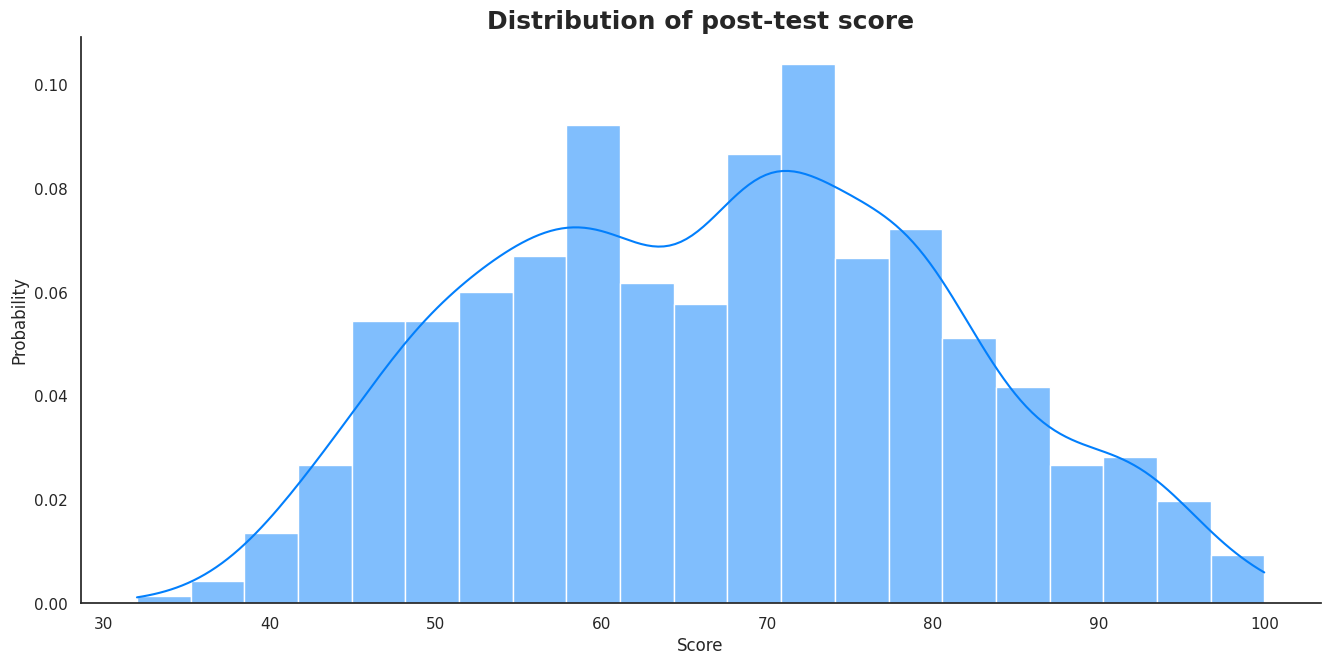

In [10]:
bar_color="#027ffc"
# plot 
fig = sns.histplot(data=df,
                   x="posttest",
                   kde=True,
                   stat="probability",
                   color=bar_color
                  );

plt.title("Distribution of post-test score", fontweight="bold", fontsize=18)
plt.xlabel("Score")

> Count-plot of categoric variables.

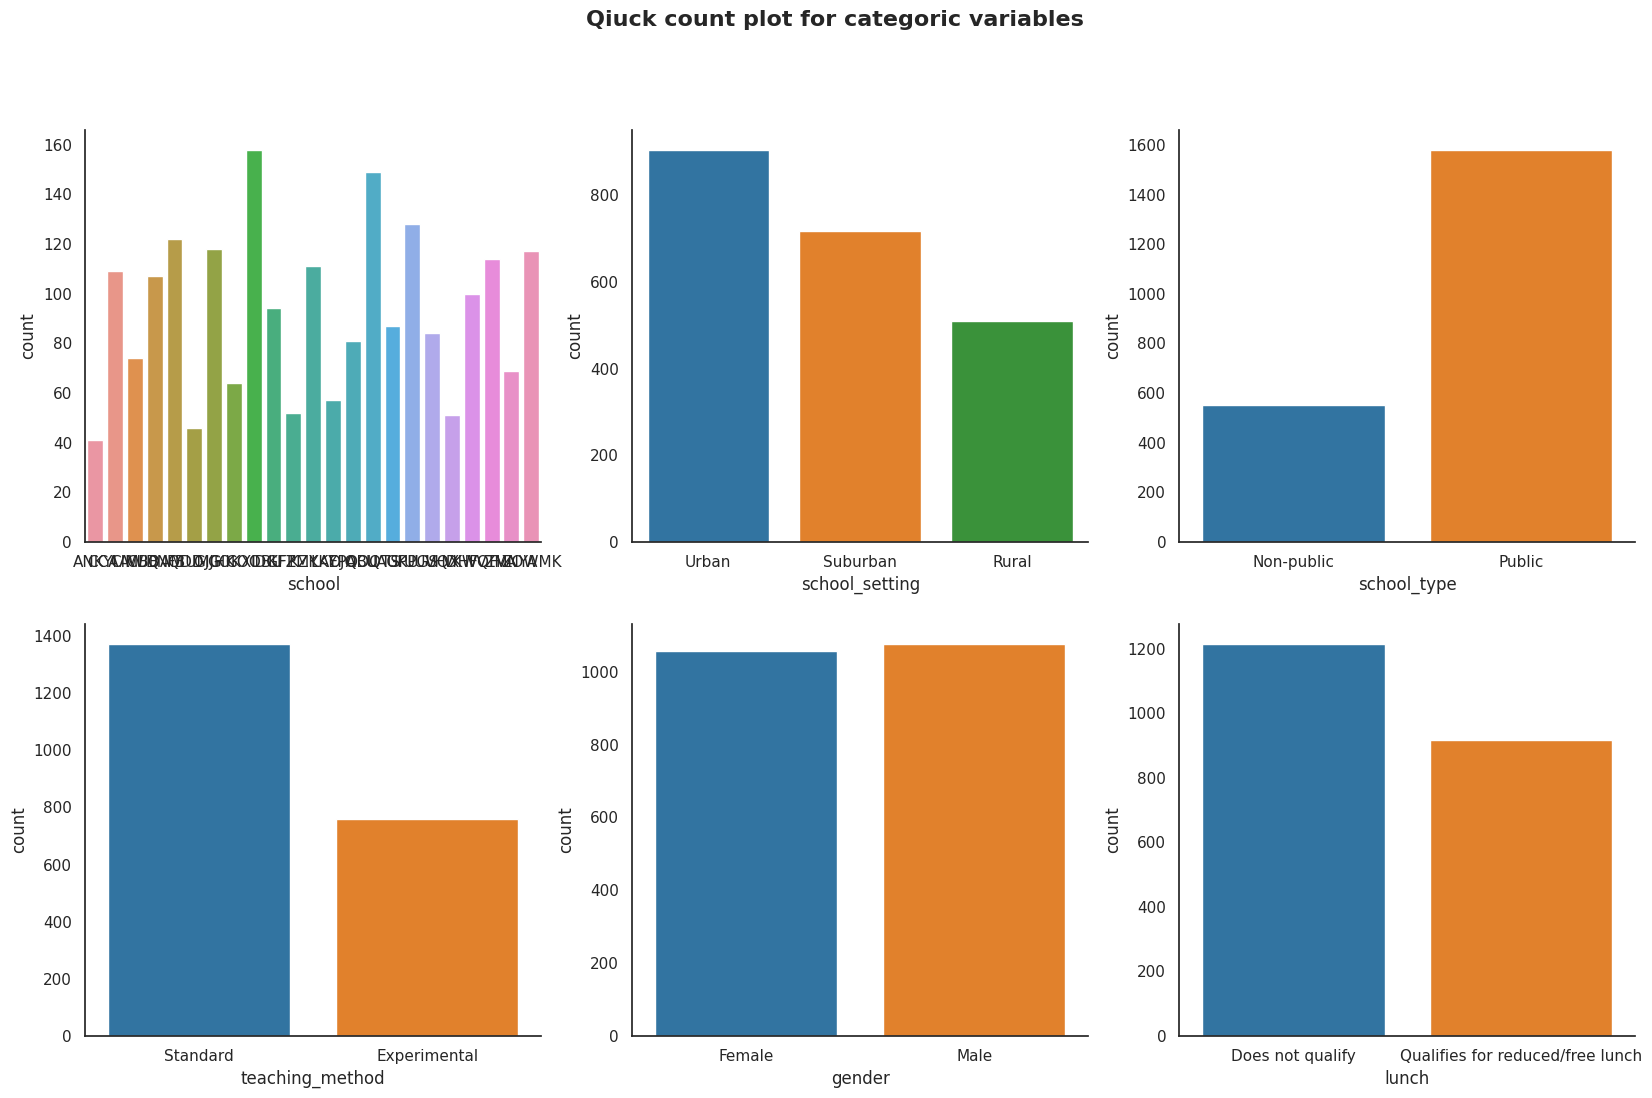

In [11]:
categoric_vars = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

fig, ax = plt.subplots(figsize=(20,12), nrows=2, ncols=3)

plt.suptitle("Qiuck count plot for categoric variables", fontweight="bold", fontsize=16)

for c, axis in zip(categoric_vars, ax.ravel()):
    sns.countplot(data=df, x=c, ax=axis)

> Average post-test score by school's features 

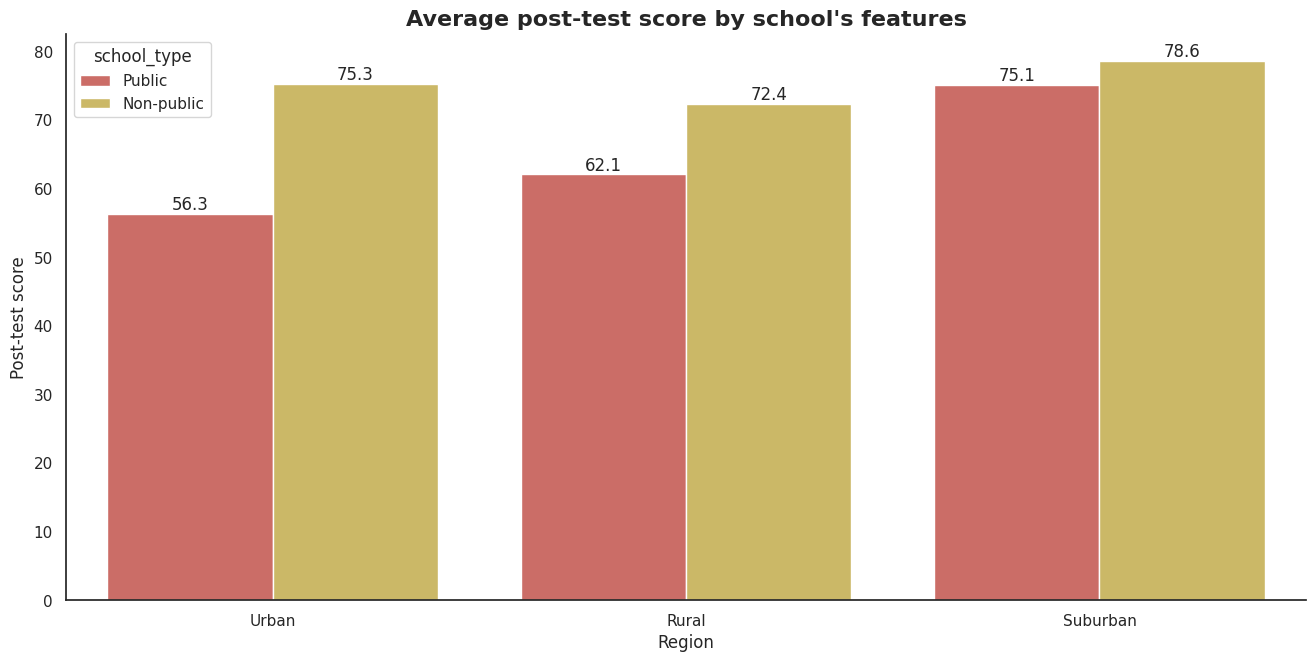

In [12]:
avgscore_school = df.groupby(by=["school_setting",
                                 "school_type"], observed=True)["posttest"].mean().round(1).sort_values().reset_index()

palette = sns.color_palette("hls", 8)

# plot 
fig = sns.barplot(data=avgscore_school,
                  x="school_setting", y="posttest",
                  hue = "school_type",
                  palette = palette,
                  orient='v',
                  dodge=.8
                  );

plt.title("Average post-test score by school's features", fontweight="bold", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Post-test score")

fig.bar_label(fig.containers[0]);
fig.bar_label(fig.containers[1]);

> Average post-test score by classroom's features 

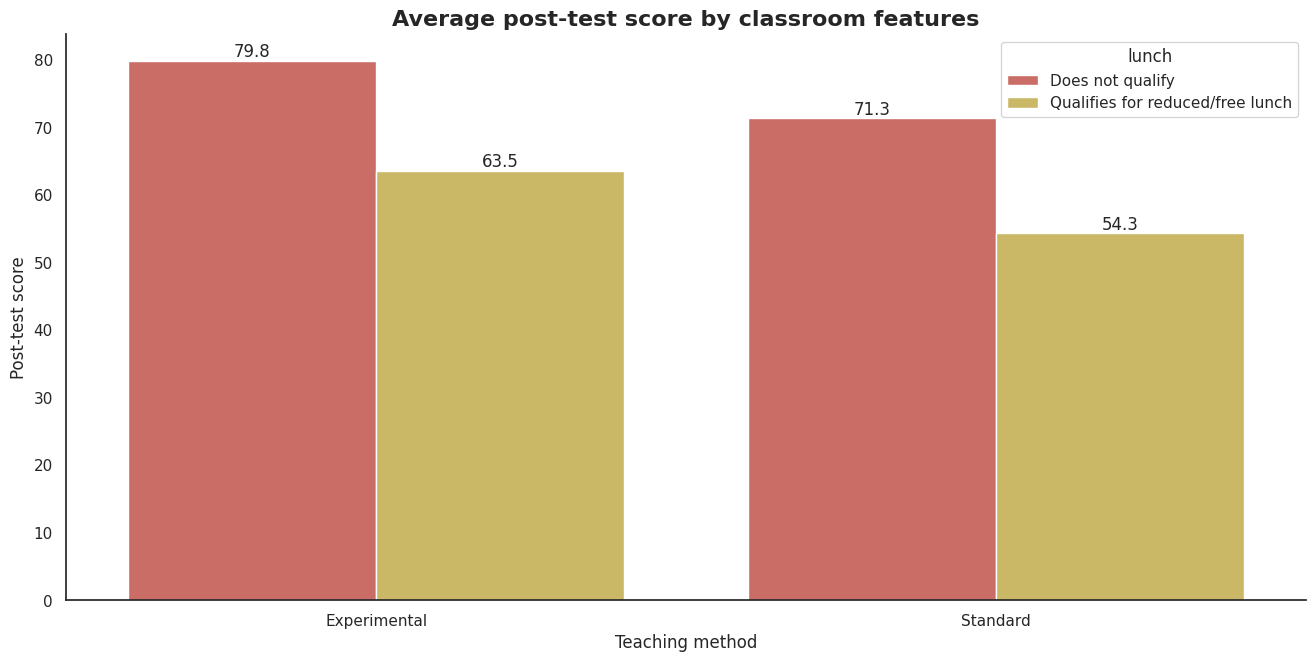

In [13]:
avgscore_classroom = df.groupby(by=["teaching_method", "lunch"])["posttest"].mean().round(1).reset_index()

# plot 
fig = sns.barplot(data=avgscore_classroom,
                  x="teaching_method", y="posttest",
                  hue = "lunch",
                  palette = palette,
                  orient='v',
                  dodge=.8
                  );

plt.title("Average post-test score by classroom features", fontweight="bold", fontsize=16)
plt.xlabel("Teaching method")
plt.ylabel("Post-test score")

fig.bar_label(fig.containers[0]);
fig.bar_label(fig.containers[1]);

> Number of student per class and post-test score

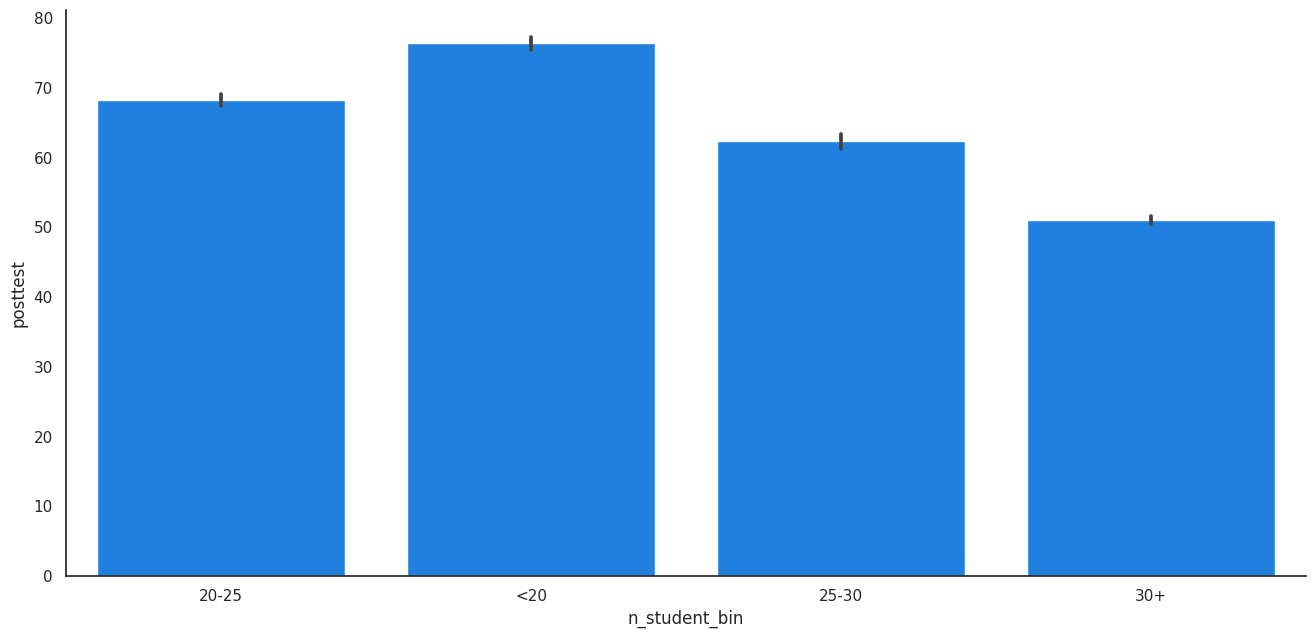

In [14]:
def create_bin(x):
    if x<20:
        return "<20"
    elif 20<=x<25:
        return "20-25"
    elif 25<=x<30:
        return "25-30"
    else:
        return "30+"

df["n_student_bin"] = df["n_student"].apply(create_bin)

fig = sns.barplot(data=df,
                  x="n_student_bin",
                  estimator=np.mean,
                  y="posttest",
                  color=bar_color
                );

> **Pretest and Posttest**

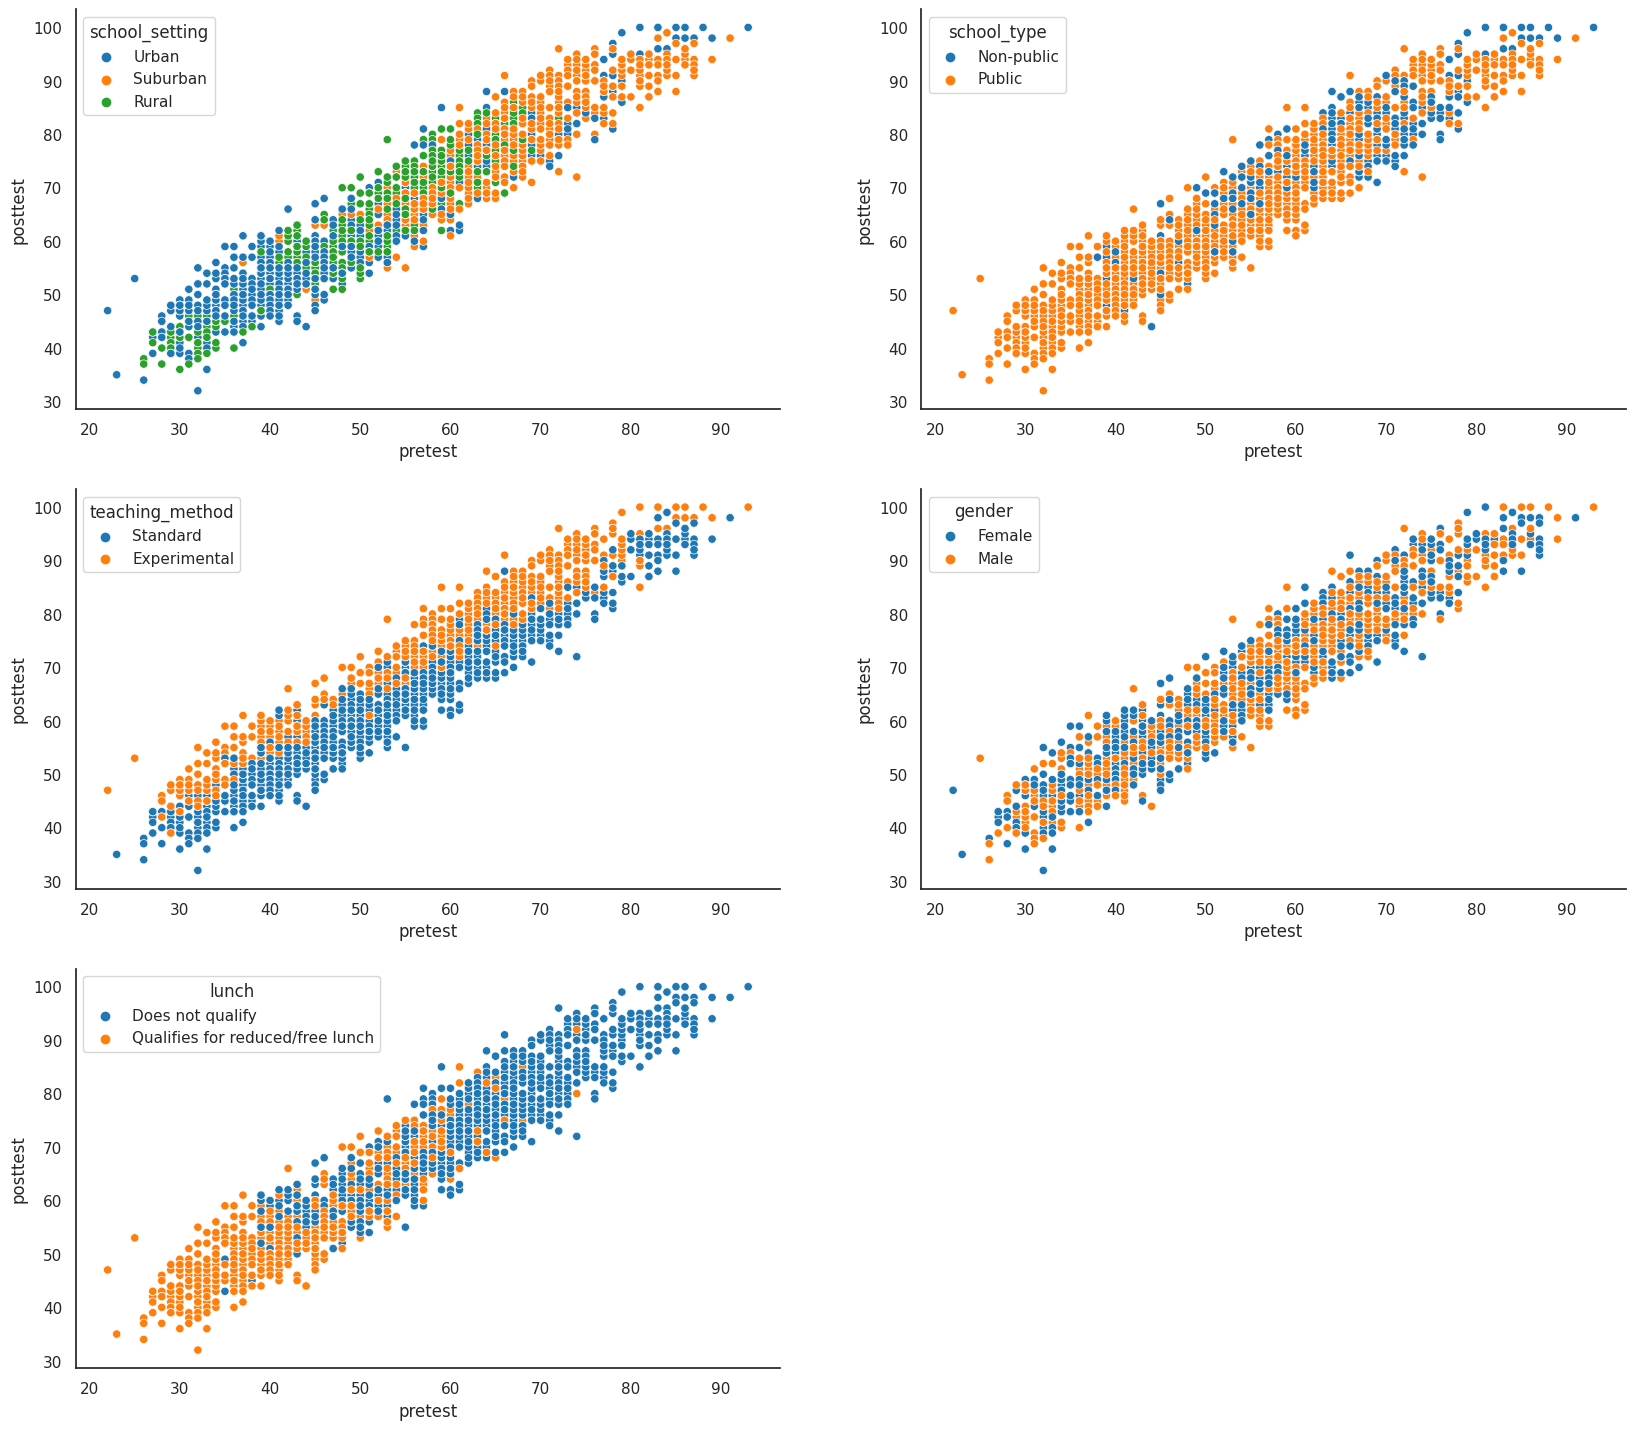

In [15]:
fig, ax = plt.subplots(figsize=(20,18), nrows=3, ncols=2)

for c, axis in zip(categoric_vars[1:], ax.ravel()):
    sns.scatterplot(data=df,
                    x="pretest", y="posttest",
                    hue=c,
                    ax=axis
                   )
    
ax[2][1].set_visible(False)

> Correlation plot

<AxesSubplot:>

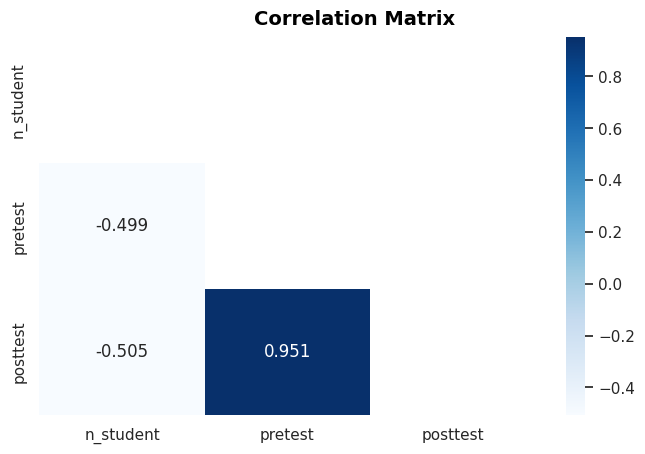

In [16]:
df_corr = df.corr().transpose()

fig = plt.figure(figsize=(8,5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

# plot
color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.3,-0.1,"Correlation Matrix",fontsize=14, fontweight='bold', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".3f",annot=True,cmap='Blues')

# 4. Build model

*I'm trying to build simple model predict post-test score based on pre-test score only...*

> Split train and test data used by this model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df["pretest"], df["posttest"],
                                                    test_size = 0.25, # use 25% data to test model
                                                    random_state=42
                                                   )
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (1599,)
The shape of X_test is  (534,)
The shape of y_train is  (1599,)
The shape of y_test is  (534,)


In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr1 = LinearRegression()
lr1.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = lr1.predict(X_test.values.reshape(-1, 1))
print("MSE: ", np.round(mean_squared_error(y_test, y_pred),3))
print("R-squared: ", np.round(r2_score(y_test, y_pred),3))

MSE:  19.047
R-squared:  0.902


Let's build more complex regression model and compare...

> Feature selection  

First, we will select the variables that are likely affect the target variable (post-test score) inferred from EDA process:  

1. school_setting
2. school_type
3. teaching_method
4. n_student_bin
5. lunch 
6. pretest

Second, we need to encode categoric variables.

In [19]:
df_train = df.copy()
var = ["school_setting", "school_type", "teaching_method", "n_student_bin", "lunch", "pretest", "posttest"]
df_train = df_train[var]

In [20]:
# Encoding data
from sklearn.preprocessing import OrdinalEncoder

X = df_train[var[:-1]]
y = df_train[var[-1]]

oe_encoder = OrdinalEncoder(dtype="int64")
X.iloc[:, :-1] = oe_encoder.fit_transform(X.iloc[:, :-1]).astype("int64")
X

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,school_setting,school_type,teaching_method,n_student_bin,lunch,pretest
student_id,,,,,,
2FHT3,2,0,1,0,0,62
3JIVH,2,0,1,0,0,66
3XOWE,2,0,1,0,0,64
556O0,2,0,1,0,0,61
74LOE,2,0,1,0,0,64
...,...,...,...,...,...,...
T8LSK,2,1,1,2,0,39
VNP26,2,1,1,2,1,38
YDR1Z,2,1,1,2,1,45


In [21]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, # use 25% data to test model
                                                    random_state=42
                                                   )
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (1599, 6)
The shape of X_test is  (534, 6)
The shape of y_train is  (1599,)
The shape of y_test is  (534,)


In [22]:
def regression_report(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
    import numpy as np
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')
        
# Source: https://github.com/scikit-learn/scikit-learn/issues/18454#issue-708338254

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("=============Linear Regression model============\n")
regression_report(y_test, y_pred)

=============Linear Regression model============

Metrics for regression:
      mean absolute error:                2.583
    median absolute error:                2.174
       mean squared error:               10.708
                max error:                9.956
                 r2 score:                0.945
 explained variance score:                0.945

Percentiles:
                        5:               -5.407
                       25:               -2.345
                       50:               -0.207
                       75:                1.929
                       95:                5.643


Good, after select important features, *Mean Squared Error* on testing data went down to **10.7** 
and *R-squared* improved to **0.945**

> Regressors with variable selection

In [24]:
from sklearn.linear_model import ElasticNet, Lasso, LassoCV, Lars, LarsCV

regr = ElasticNet()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("=============ElasticNET Regression model============\n")
regression_report(y_test, y_pred)

=============ElasticNET Regression model============

Metrics for regression:
      mean absolute error:                3.244
    median absolute error:                2.798
       mean squared error:               16.038
                max error:               12.463
                 r2 score:                0.918
 explained variance score:                0.918

Percentiles:
                        5:               -6.427
                       25:               -2.848
                       50:               -0.371
                       75:                2.483
                       95:                6.481


In [25]:
regr = LassoCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("=============LassoCV Regression model============\n")
regression_report(y_test, y_pred)

=============LassoCV Regression model============

Metrics for regression:
      mean absolute error:                2.621
    median absolute error:                2.147
       mean squared error:               11.019
                max error:               10.102
                 r2 score:                0.944
 explained variance score:                0.944

Percentiles:
                        5:               -5.551
                       25:               -2.359
                       50:               -0.249
                       75:                1.899
                       95:                5.791


In [26]:
# Function: if score >100, return 100
limit = lambda x: 100 if x>100 else x
vect_limit = np.vectorize(limit)

# Map to y_pred
y_pred = vect_limit(np.round(lr.predict(X_test),1))

# Create result
result = X_test.copy()
result["Actual post-test score"] = y_test
result["Predited post-test score"] = y_pred

In [27]:
result.head(20)

,school_setting,school_type,teaching_method,n_student_bin,lunch,pretest,Actual post-test score,Predited post-test score
student_id,,,,,,,,
1M80R,2,1,1,1,0,53,68,63.2
WV4F0,1,1,0,0,0,70,87,85.4
6CQH6,0,0,0,3,1,56,70,72.0
AD7YT,0,1,1,0,1,51,61,61.0
LNU0R,2,1,1,1,1,53,63,62.4
OBJSU,2,1,1,1,0,60,68,69.8
ARY9N,2,1,0,2,1,41,55,57.3
QDBCB,1,1,1,0,0,82,89,90.5
CFICH,1,0,0,0,0,76,84,91.3


In [28]:
result.to_csv("./PredictStudentScore_LinearRegression.csv")